In [60]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.manifold import TSNE 
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

In [61]:
# read data
iris = pd.read_csv("iris.txt", sep = ' ', header = None)
images = pd.read_csv("images.txt", header = None)

In [62]:
# Normalize and dimensionality reduction

def preProcess(data):
    
    # normalize data
    normalized_data = normalize(data)
    
    # perform dimensionality reduction on the normalized data and return the reduced data
    tsne = TSNE(n_components=2, random_state=42)
    reduced_data = tsne.fit_transform(normalized_data)
    

    return reduced_data

In [63]:
data_images = preProcess(images)
data_iris = preProcess(iris)

In [ ]:
# Implement the KMeans clustering 

class KMeans:
    
    def __init__(self, k=3, return_sse = False, max_iter = 2500):
        self.k = k
        self.return_sse = return_sse 
        self.max_iter = max_iter
        
    def fit_predict(self, data):
        self.data = data
        
        # Initialize the centroids 
        self.centroids = self.initialize_centroids()
        x = 0;
        
        while x < self.max_iter:
            
            ''' After initializing the centroids, calculate the distance of each sample/row to the centroids
                For every row/sample you should get three distances, one for each centroid'''
            
            distances = self.distances()
            
            # Assign each data point to the cluster represented by the index of its nearest centroid.
            self.cluster_indices = (np.argmin(distances, axis=1))+1 # Determine the index of the centroid with the minimum distance.
            
            
            self.old_centroids = self.centroids.copy()
            
            # Update each centroid by computing the mean of the data points assigned to its cluster.
            self.centroids = [] # mean of the data points in cluster i
            for i in range(self.k):
                temparr = []
                for j, point in enumerate(self.data):
                    if self.cluster_indices[j] == (i+1):
                        temparr.append(point)
            
                temparr = np.array(temparr)
                mean_per_column = np.mean(temparr, axis=0)
                self.centroids.append(mean_per_column)
                
            self.centroids = np.array(self.centroids)
                
            ''' Compare whether the old centroids and newly computed centroids are equal, 
            if they are equal terminate the algorithm '''
            # compare here
            bool = (self.centroids == self.old_centroids)
            if bool.all == True:
                #print("# of iterations: ",x)
                break
            else:
                x+=1;
        
        if self.return_sse:
            sse = self.compute_sse()

            return sse
        
        return self.cluster_indices
    
    
    
    
    # This method initializes the centroids
    def initialize_centroids(self):
        # initialize centroids using self.data and self.k
        np.random.seed(42)
        indices = np.random.choice(self.data.shape[0], self.k, replace=False)
        centroids = np.array([self.data[i] for i in indices])
         
        return centroids

    
    
    
    # This method calculates the distance
    def distances(self):
        # caulcuate distance using self.data and self.centroids
        distances = []
        
        for point in self.data:
            dist_per_centroid = []
            for centroid in self.centroids:
                dist_per_centroid.append(euclidean(point, centroid))
            distances.append(dist_per_centroid)
        
        distances = np.array(distances)
            
        return distances

    
    
    # Compute SSE (Sum of Squared Errors) (Use can implement any objective function of your choice)
    def compute_sse(self):
        # compute sse using self.data, self.cluster_indices, self.k (refer to the formula mentioned in KMeans slides)
        SSE_vals = []
        for i in range(self.k):
            cluster = i + 1
            error = []
            for ind, j in enumerate(self.cluster_indices):
                if(j == cluster):
                    error.append(euclidean(self.data[ind], self.centroids[i]))
            SSE_vals.append(np.sum(error)**2)
            
        SSE_vals = np.array(SSE_vals)
        sse = np.min(SSE_vals)
        
        return sse


In [188]:
def plot_sse(sse, K):
    # plot of objective function (y-axis) vs. value of K increasing from 2 to 20 in steps of 2 (x-axis)
    plt.plot(K, sse)
    plt.xlabel('K-values')
    plt.ylabel('SSE')
    plt.title('objective function vs K')
    plt.show()

# Objective function vs K for Iris

In [162]:
K = [i for i in range(1,11)]
sse = []
for k in K:
    model = KMeans(k = k, return_sse = True)
    sse.append(model.fit_predict(data_iris))

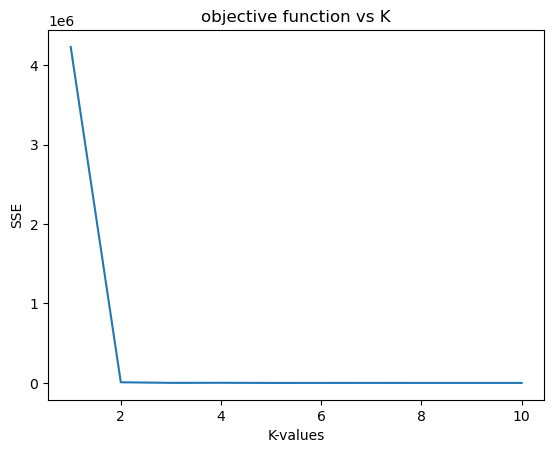

In [189]:
plot_sse(sse, range(1, 11))

# Make cluster assignments for Iris data

In [190]:
# Initialize KMeans class with k = 3 and get the clusters
# Write the clusters to .txt file and upload the file to miner
model = KMeans(k = 3, return_sse = False)
clusters_indices = model.fit_predict(data_iris)

with open("output_iris.txt", "w") as file:
    # Convert each integer to a string and write it to the file
    for ind in clusters_indices:
        file.write(str(ind) + "\n")

# Objective function vs K for Image data

In [206]:
K = [i for i in range(2,21, 2)]
sse = []
for k in K:
    model = KMeans(k = k, return_sse = True, max_iter = 100)
    sse.append(model.fit_predict(data_images))

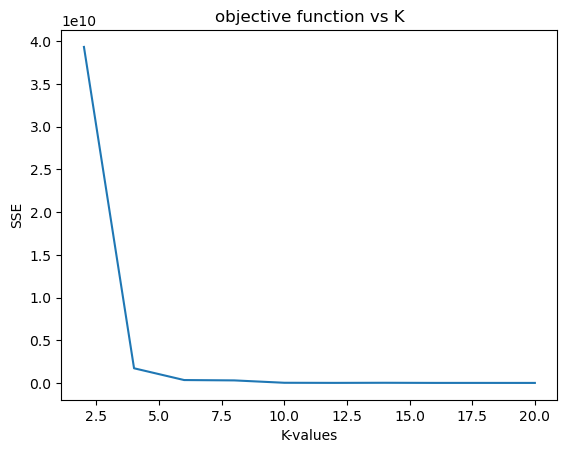

In [205]:
plot_sse(sse, range(2,21, 2))

# Make cluster assignments for Image data

In [ ]:
# Initialize KMeans class with k = 10 and get the clusters
# Write the clusters to .txt file and upload the file to miner
model = KMeans(k = 10, return_sse = False, max_iter = 1000)
clusters_indices_img = model.fit_predict(data_images)

with open("output_images.txt", "w") as file:
    # Convert each integer to a string and write it to the file
    for ind in clusters_indices_img:
        file.write(str(ind) + "\n")